In [1]:
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.4 MB/s eta 0:00:00


In [2]:
import yfinance as yf

In [ ]:
# 패키지 임포트: numpy, pandas, matplotlib, seaborn, yfinance, scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.optimize as sco

# seaborn 세팅하기
sns.set()

# yfinance로 ETF 가격 데이터 다운로드하기

### 여러 종목 데이터 한꺼번에 받기

여러 종목들에 대한 티커 객체를 만들고자 한다면 `Ticker()` 메서드가 아닌 `Tickers()` 메서드를 사용해야 한다. SPY와 TLT, 두 가지 ETF의 가격 데이터를 사용해보겠다. SPY는 S&P 500 지수를 추종하는 ETF이며, TLT는 미국 장기채를 추종하는 ETF다. 각각 미국 주식과 미국 채권을 대표하는 ETF라고 할 수 있다.

In [4]:
tickers = ['SPY', 'TLT']

etf = yf.Tickers(tickers)

data = etf.history(start='2002-08-01', actions=False) #TLT 출시일 기준
data

[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.695248   41.774372   61.423303   41.784437   59.392672   
2002-08-02   58.357159   42.202187   59.782638   42.328013   57.570458   
2002-08-05   56.326530   42.388412   58.451301   42.499140   56.178608   
2002-08-06   58.222679   42.026016   59.103520   42.227339   57.227537   
2002-08-07   59.237991   42.126682   59.506950   42.348138   57.671310   
...                ...         ...         ...         ...         ...   
2023-03-13  383.894836  105.830002  388.905741  109.099998  379.202752   
2023-03-14  390.240662  104.089996  391.954123  105.610001  385.578432   
2023-03-15  387.799957  106.099998  388.009150  107.709999  382.251127   
2023-03-16  394.603973  105.269997  394.962620  108.029999  384.821332   
2023-03-17  389.989990  106.849998  394.399994  107.730003  388.549988   

                              Open                 Volume            
                   TLT         SPY         TLT        SPY       TLT  
Date                                                                 
2002-08-01   41.542852   61.107277   41.542852   66571900     25000  
2002-08-02   41.713979   59.506953   41.854908   51772900     52800  
2002-08-05   42.202188   58.155446   42.297817   47191300     61100  
2002-08-06   41.885091   57.308227   42.212241   64730000     64900  
2002-08-07   41.955560   59.083343   42.076352   43289400     40300  
...                ...         ...         ...        ...       ...  
2023-03-13  105.040001  380.358346  108.199997  157790000  51502500  
2023-03-14  103.750000  389.015327  105.139999  149752400  38417800  
2023-03-15  105.349998  384.422862  106.779999  172996900  45164100  
2023-03-16  105.040001  385.349316  107.379997  143254200  43089300  
2023-03-17  106.459999  393.220001  106.650002  140047400  38108400  

[5193 rows x 10 columns]

종가 데이터만을 활용하고자 한다.

In [5]:
data.drop(['Open', 'Low', 'High', 'Volume'], inplace=True, axis=1)
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.695248   41.774372
2002-08-02   58.357159   42.202187
2002-08-05   56.326530   42.388412
2002-08-06   58.222679   42.026016
2002-08-07   59.237991   42.126682
...                ...         ...
2023-03-13  383.894836  105.830002
2023-03-14  390.240662  104.089996
2023-03-15  387.799957  106.099998
2023-03-16  394.603973  105.269997
2023-03-17  389.989990  106.849998

[5193 rows x 2 columns]

'Close' 제목 칼럼 제거

In [6]:
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.695248,41.774372
2002-08-02,58.357159,42.202187
2002-08-05,56.326530,42.388412
2002-08-06,58.222679,42.026016
2002-08-07,59.237991,42.126682
...,...,...
2023-03-13,383.894836,105.830002
2023-03-14,390.240662,104.089996
2023-03-15,387.799957,106.099998


<Axes: xlabel='Date'>

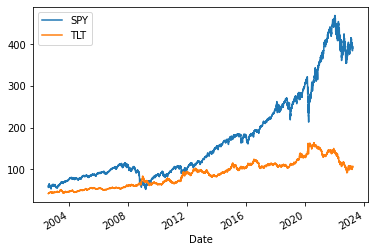

In [7]:
data.plot()

### **입력변수: 수익률, 변동성, 상관계수**

In [9]:
import matplotlib.pyplot as plt

#### 1. 수익률

                 SPY       TLT
Date                          
2002-08-01  0.000000  0.000000
2002-08-02 -0.022415  0.010241
2002-08-05 -0.034797  0.004413
2002-08-06  0.033664 -0.008549
2002-08-07  0.017438  0.002395
...              ...       ...
2023-03-13 -0.001425  0.002273
2023-03-14  0.016530 -0.016442
2023-03-15 -0.006254  0.019310
2023-03-16  0.017545 -0.007823
2023-03-17 -0.011693  0.015009

[5193 rows x 2 columns]


Text(0, 0.5, 'Returns')

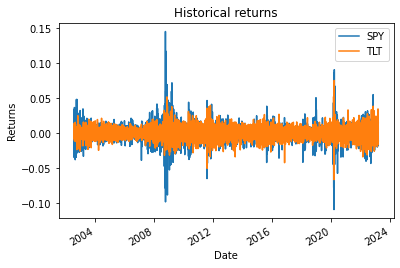

In [10]:
# 수익률 계산
rets = data.pct_change().fillna(0)
print(rets)

# 수익률 데이터 확인
rets.head()

# 수익률 데이터 시각화
rets.plot()
plt.title('Historical returns')
plt.xlabel('Date')
plt.ylabel('Returns')

#### 2. 변동성

SPY    0.193507
TLT    0.143404
dtype: float64
                 SPY       TLT
Date                          
2002-08-01       NaN       NaN
2002-08-02       NaN       NaN
2002-08-05       NaN       NaN
2002-08-06       NaN       NaN
2002-08-07       NaN       NaN
...              ...       ...
2023-03-13  0.234622  0.206110
2023-03-14  0.234881  0.206663
2023-03-15  0.234851  0.206401
2023-03-16  0.234473  0.206522
2023-03-17  0.233685  0.206853

[5193 rows x 2 columns]


Text(0, 0.5, 'Vols')

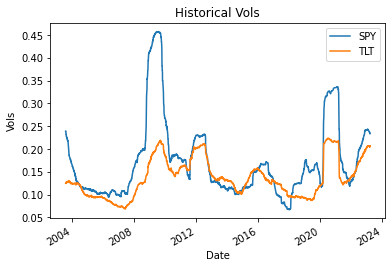

In [12]:
# 전체 기간 변동성 계산
total_vols = rets.std() * np.sqrt(252)
print(total_vols)

# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(252).std() * np.sqrt(252)
print(vols)

# 변동성 시각화
vols.plot()
plt.title('Historical Vols')
plt.xlabel('Date')
plt.ylabel('Vols')

.sqrt(252) -> 연율화

#### 3. 상관계수

-0.3555953649076936
Date
2002-08-01         NaN
2002-08-02         NaN
2002-08-05         NaN
2002-08-06         NaN
2002-08-07         NaN
                ...   
2023-03-13    0.133275
2023-03-14    0.128450
2023-03-15    0.122700
2023-03-16    0.120700
2023-03-17    0.112287
Length: 5193, dtype: float64


Text(0, 0.5, 'Correlation')

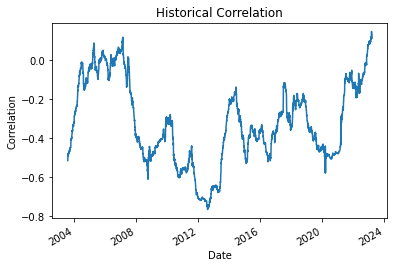

In [13]:
# SPY와 TLT의 수익률
spy_rets = rets['SPY']
tlt_rets = rets['TLT']

# 전체 기간 상관계수 계산
total_corr = spy_rets.corr(tlt_rets)
print(total_corr)

# 1년 단위 롤링 상관계수 계산
corr = spy_rets.rolling(252).corr(tlt_rets)
print(corr)

# 상관계수 시각화
corr.plot()
plt.title('Historical Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')

#### 4. ETF 유니버스 데이터 처리

#### ETF 유니버스

| Ticker | Sector |
| ------ | -----  |
| XLB | 소재 |
| XLE | 에너지 |
| XLF | 금융 |
| XLI | 산업재 |
| XLK | IT |
| XLP | 필수소비재 |
| XLU | 유틸리티 |
| XLV | 헬스케어 |
| XLY | 임의소비재 |

In [14]:
# ETF 유니버스 티커 설정
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# 티커 객체 선언
yfObj = yf.Tickers(tickers)

# 과거 데이터 다운로드
df = yfObj.history(start='2011-01-01', end='2022-10-14')

# 종가를 제외한 나머지 컬럼 삭제
df.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume','Capital Gains'], inplace=True, axis=1)

# NaN 값을 이전 값으로 채워넣기
df.ffill(inplace=True)

# 첫 번째 칼럼 레벨 삭제
df = df.droplevel(0, axis=1)

# 주간 단위로 데이터 재설정
df = df.resample('W').last()

[*********************100%***********************]  9 of 9 completed


In [15]:
df

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2011-01-09,29.849514,45.442646,10.522150,27.864801,21.535372,21.036852,20.785421,26.165461,32.254097
2011-01-16,30.231298,47.019966,10.846506,28.378477,21.886631,21.254250,20.890734,26.255211,32.442322
2011-01-23,29.202810,46.653923,10.677840,28.370567,21.510281,21.370195,21.028950,26.263369,32.356781
2011-01-30,29.459948,47.326103,10.541608,28.315256,21.602287,21.000618,20.831499,25.790159,31.740774
2011-02-06,30.839054,49.336006,10.775148,29.066004,22.321524,21.232512,20.930222,26.377596,32.690434
...,...,...,...,...,...,...,...,...,...
2022-09-18,72.023422,76.802971,32.682068,88.363251,128.025391,70.364418,73.368683,126.423218,157.179230
2022-09-25,67.989548,69.761497,30.856514,84.347420,123.385712,68.886017,71.177612,122.226517,146.019806
2022-10-02,67.572250,71.285797,30.170815,82.446487,118.439911,66.254890,64.978340,120.613159,142.060654


<Axes: xlabel='Date'>

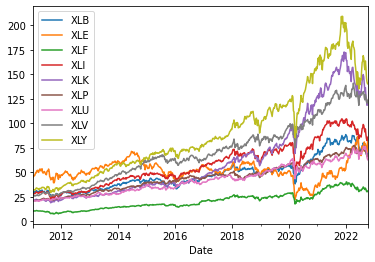

In [16]:
# 역사적 가격 그래프 시각화
df.plot()

<Axes: xlabel='Date'>

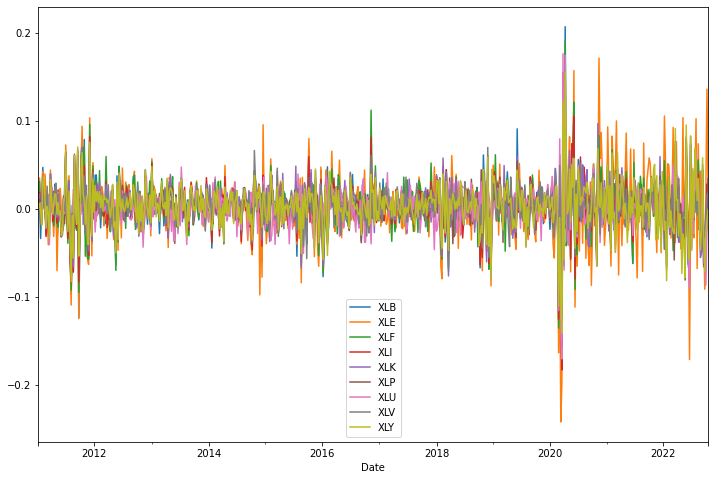

In [17]:
# ETF 수익률 계산
rets = df.pct_change().fillna(0)

# 수익률 시각화
rets.plot(figsize=(12, 8))

<Axes: xlabel='Date'>

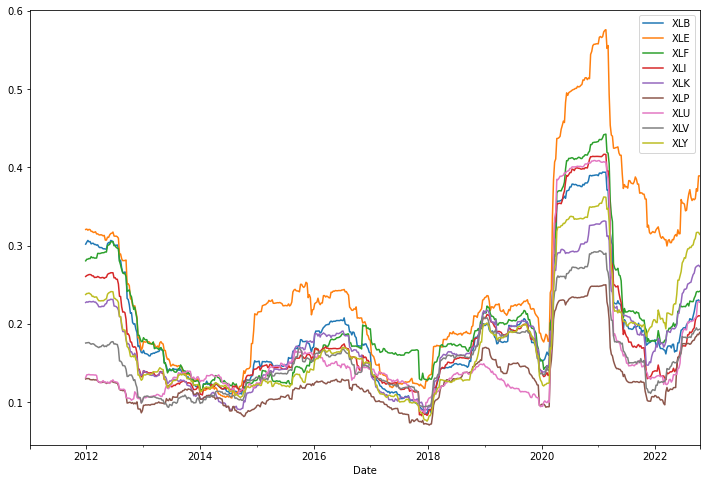

In [18]:
# 1년 단위 롤링 변동성 계산 및 연율화
vols = rets.rolling(52).std() * np.sqrt(52)

# 변동성 시각화
vols.plot(figsize=(12, 8))

In [19]:
# 전체 기간 ETF 상관계수 계산
corr = rets.corr()
corr

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,1.000000,0.719689,0.829266,0.886240,0.737775,0.612623,0.502272,0.684392,0.774423
XLE,0.719689,1.000000,0.705963,0.732264,0.513575,0.470045,0.382715,0.498355,0.552228
XLF,0.829266,0.705963,1.000000,0.887685,0.715743,0.619180,0.492558,0.675951,0.780120
XLI,0.886240,0.732264,0.887685,1.000000,0.791119,0.695931,0.572718,0.723720,0.831997
XLK,0.737775,0.513575,0.715743,0.791119,1.000000,0.680499,0.492137,0.735613,0.868778
XLP,0.612623,0.470045,0.619180,0.695931,0.680499,1.000000,0.677202,0.718565,0.690610
XLU,0.502272,0.382715,0.492558,0.572718,0.492137,0.677202,1.000000,0.569010,0.537086
XLV,0.684392,0.498355,0.675951,0.723720,0.735613,0.718565,0.569010,1.000000,0.726924
XLY,0.774423,0.552228,0.780120,0.831997,0.868778,0.690610,0.537086,0.726924,1.000000


<Axes: >

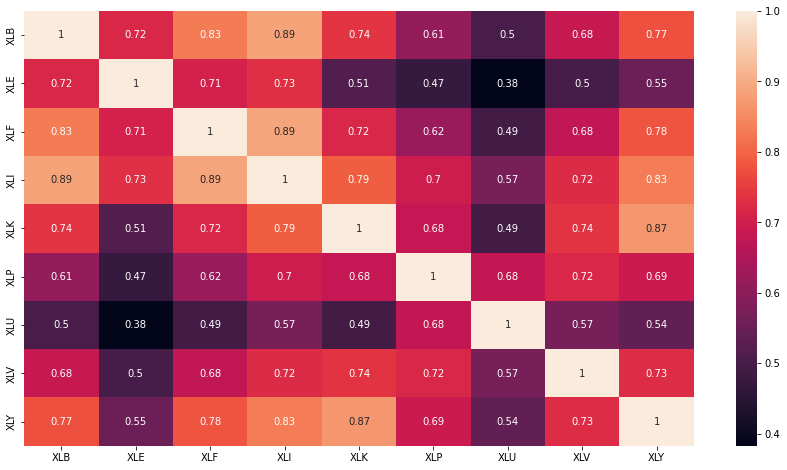

In [20]:
# seaborn 패키지 임포트
import seaborn as sns

# 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

##### 공분산 행렬 특징 이해하기

In [21]:
# 공분산 계산 및 연율화
cov = rets.cov() * 52
cov

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.043178,0.041900,0.037557,0.036560,0.029055,0.017391,0.018630,0.023177,0.031572
XLE,0.041900,0.078500,0.043111,0.040731,0.027271,0.017992,0.019141,0.022756,0.030356
XLF,0.037557,0.043111,0.047506,0.038411,0.029566,0.018437,0.019163,0.024011,0.033360
XLI,0.036560,0.040731,0.038411,0.039413,0.029766,0.018875,0.020296,0.023416,0.032407
XLK,0.029055,0.027271,0.029566,0.029766,0.035919,0.017620,0.016649,0.022721,0.032304
XLP,0.017391,0.017992,0.018437,0.018875,0.017620,0.018665,0.016515,0.015999,0.018511
XLU,0.018630,0.019141,0.019163,0.020296,0.016649,0.016515,0.031863,0.016553,0.018810
XLV,0.023177,0.022756,0.024011,0.023416,0.022721,0.015999,0.016553,0.026561,0.023244
XLY,0.031572,0.030356,0.033360,0.032407,0.032304,0.018511,0.018810,0.023244,0.038494


In [22]:
# var() 메서드를 사용한 ETF 분산 계산
vols_1 = rets.var() * 52
vols_1

XLB    0.043178
XLE    0.078500
XLF    0.047506
XLI    0.039413
XLK    0.035919
XLP    0.018665
XLU    0.031863
XLV    0.026561
XLY    0.038494
dtype: float64

In [23]:
# 공분산 행렬 및 diag() 메서드를 사용한 ETF 분산 계산
vols_2 = np.diag(cov)
vols_2

array([0.0431778 , 0.07850009, 0.04750551, 0.0394133 , 0.03591856,
       0.01866471, 0.03186308, 0.02656078, 0.03849363])

# 주식-채권 배분 모델

### 패키지 임포트

In [24]:
# 패키지 임포트
import numpy as np
import yfinance as yf
import seaborn as sns
sns.set()

### 가격 데이터 다운로드 및 전처리

In [25]:
# 티커
tickers = ['SPY', 'TLT']

# 티커 객체
etf = yf.Tickers(tickers)

# 데이터 다운로드
data = etf.history(start='2002-08-01', actions=False)
data

[*********************100%***********************]  2 of 2 completed


Close                    High                     Low  \
                   SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2002-08-01   59.695232   41.774395   61.423287   41.784459   59.392657   
2002-08-02   58.357159   42.202190   59.782638   42.328017   57.570458   
2002-08-05   56.326519   42.388401   58.451289   42.499129   56.178596   
2002-08-06   58.222637   42.026031   59.103477   42.227355   57.227496   
2002-08-07   59.237991   42.126659   59.506950   42.348115   57.671310   
...                ...         ...         ...         ...         ...   
2023-03-13  383.894836  105.830002  388.905741  109.099998  379.202752   
2023-03-14  390.240662  104.089996  391.954123  105.610001  385.578432   
2023-03-15  387.799957  106.099998  388.009150  107.709999  382.251127   
2023-03-16  394.603973  105.269997  394.962620  108.029999  384.821332   
2023-03-17  389.989990  106.849998  394.399994  107.730003  388.549988   

                              Open                 Volume            
                   TLT         SPY         TLT        SPY       TLT  
Date                                                                 
2002-08-01   41.542875   61.107261   41.542875   66571900     25000  
2002-08-02   41.713983   59.506953   41.854912   51772900     52800  
2002-08-05   42.202177   58.155434   42.297806   47191300     61100  
2002-08-06   41.885106   57.308185   42.212256   64730000     64900  
2002-08-07   41.955537   59.083343   42.076330   43289400     40300  
...                ...         ...         ...        ...       ...  
2023-03-13  105.040001  380.358346  108.199997  157790000  51502500  
2023-03-14  103.750000  389.015327  105.139999  149752400  38417800  
2023-03-15  105.349998  384.422862  106.779999  172996900  45164100  
2023-03-16  105.040001  385.349316  107.379997  143254200  43089300  
2023-03-17  106.459999  393.220001  106.650002  140047400  38108400  

[5193 rows x 10 columns]

In [26]:
# 불필요한 칼럼 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data

Close            
                   SPY         TLT
Date                              
2002-08-01   59.695232   41.774395
2002-08-02   58.357159   42.202190
2002-08-05   56.326519   42.388401
2002-08-06   58.222637   42.026031
2002-08-07   59.237991   42.126659
...                ...         ...
2023-03-13  383.894836  105.830002
2023-03-14  390.240662  104.089996
2023-03-15  387.799957  106.099998
2023-03-16  394.603973  105.269997
2023-03-17  389.989990  106.849998

[5193 rows x 2 columns]

In [27]:
# 0 레벨 칼럼 제목 제거
data = data.droplevel(0, axis=1)
data

,SPY,TLT
Date,,
2002-08-01,59.695232,41.774395
2002-08-02,58.357159,42.202190
2002-08-05,56.326519,42.388401
2002-08-06,58.222637,42.026031
2002-08-07,59.237991,42.126659
...,...,...
2023-03-13,383.894836,105.830002
2023-03-14,390.240662,104.089996
2023-03-15,387.799957,106.099998


<Axes: xlabel='Date'>

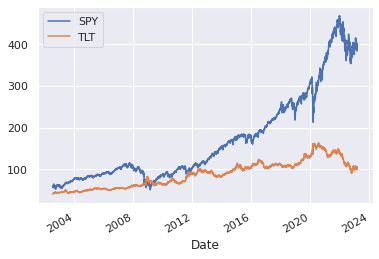

In [28]:
# 가격 그래프
data.plot()

### 일별 수익률 데이터

<Axes: xlabel='Date'>

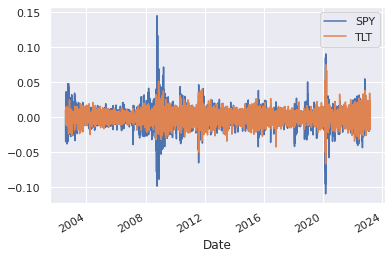

In [29]:
# 일별 수익률 데이터
rets = data.pct_change().fillna(0)

# 수익률 데이터 시각화
rets.plot()

### 개별 자산 평균 수익률과 변동성, 샤프비율

In [30]:
# 주식 기대 수익률과 변동성
stock_mu = rets['SPY'].mean() * 252
stock_sigma = rets['SPY'].std() * np.sqrt(252)

# 주식 샤프 비율
stock_sr = stock_mu / stock_sigma

# 채권 기대 수익률과 변동성
bond_mu = rets['TLT'].mean() * 252
bond_sigma = rets['TLT'].std() * np.sqrt(252)

# 채권 샤프 비율
bond_sr = bond_mu / bond_sigma

# 결과 출력
print(stock_sr, bond_sr)

0.5675989388678259 0.3894836994261801


### 70-30 포트폴리오 구현

In [31]:
# 주식 가중치 70%, 채권 가중치 30%
weights = 0.7

In [32]:
# 포트폴리오 수익률
port_ret = weights * rets['SPY'] + (1 - weights) * rets['TLT']

In [33]:
# NaN 값 제거
port_ret.dropna(inplace=True)

In [34]:
# 결과 출력
port_ret

Date
2002-08-01    0.000000
2002-08-02   -0.012618
2002-08-05   -0.023034
2002-08-06    0.020999
2002-08-07    0.012926
                ...   
2023-03-13   -0.000316
2023-03-14    0.006639
2023-03-15    0.001415
2023-03-16    0.009935
2023-03-17   -0.003682
Length: 5193, dtype: float64

<Axes: xlabel='Date'>

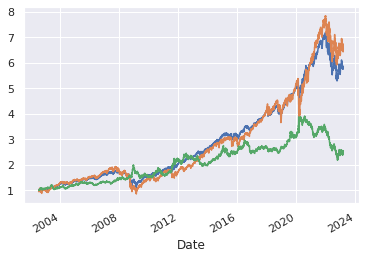

In [35]:
# 그래프 시각화
(1 + port_ret).cumprod().plot()
(1 + rets['SPY']).cumprod().plot()
(1 + rets['TLT']).cumprod().plot()

*   blue -> portfolio
*   orange -> SPY
*   green -> TLT



### 포트폴리오 수익률과 변동성 분석

In [36]:
# 포트폴리오 기대수익률
port_mu = port_ret.mean() * 252

# 포트폴리오 변동성
port_sigma = port_ret.std() * np.sqrt(252)

# 결과 출력
print('Returns = {}'.format(port_mu))
print('Vol = {}'.format(port_sigma))
print('SR = {}'.format(port_mu / port_sigma))

Returns = 0.09363994157407925
Vol = 0.1267058595051768
SR = 0.7390340268379887


### 주식-채권 상관계수 분석

In [37]:
# 1년 롤링 상관계수
historical_corr = rets['SPY'].rolling(252).corr(rets['TLT'])

<Axes: xlabel='Date'>

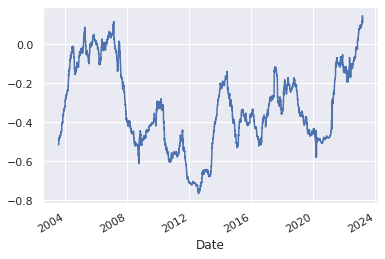

In [38]:
# 롤링 상관계수 시각화
historical_corr.plot()

### ETF 가격 데이터 다운로드

In [ ]:
# 티커 리스트 정의
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

# etf 객체 정의
etf = yf.Tickers(tickers)

# ETF 시계열 가격 데이터 다운로드
data = etf.history(start='2011-01-01', actions=False)

# 종가 이외의 데이터 제거
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)

# 열 이름 레벨 다운그레이드
data = data.droplevel(0, axis=1)

[*********************100%***********************]  9 of 9 completed


In [ ]:
# 수익률 데이터
rets = data.pct_change().fillna(0)

# 기대수익률 계산
er = rets.mean() * 252

# 공분산행렬 계산
cov = rets.cov() * 252

### 샤프비율 최대화 포트폴리오

In [ ]:
# 샤프비율 최대화 포트폴리오 가중치 산출 함수 구현
def get_msr_weights(er, cov):

    # 자산개수
    noa = er.shape[0]

    # 가중치 초기값
    init_guess = np.repeat(1/noa, noa)

    # 자산 가중치 상하한
    bounds = ((0.0, 1.0), ) * noa

    # 레버리지 불가 제약조건
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}

    # 목적함수
    def neg_sharpe(weights, er, cov):
        r = weights.T @ er
        vol = np.sqrt(weights.T @ cov @ weights)
        return - r / vol

    # 최적화 수행
    res = sco.minimize(neg_sharpe,
                       init_guess,
                       args=(er, cov),
                       method='SLSQP',
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    
    return res.x #가중치 반환

In [ ]:
# MSR 포트폴리오 가중치
msr_weights = get_msr_weights(er, cov)

# MSR 포트폴리오 수익률
msr_ret = np.dot(msr_weights, er)

# MSR 포트폴리오 변동성
msr_vol = np.sqrt(np.dot(msr_weights.T, np.dot(cov, msr_weights)))

print('Return = {}'.format(msr_ret))
print('Volatility = {}'.format(msr_vol))

Return = 0.14240980936894637
Volatility = 0.1579575745430345


<AxesSubplot:>

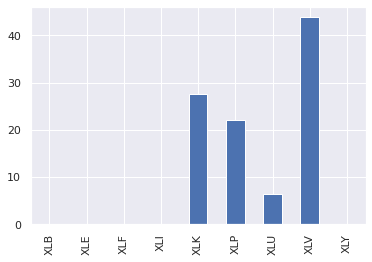

In [ ]:
# 시장 포트폴리오 가중치 시각화
msr_weights_series = pd.Series(np.round(msr_weights, 4) * 100, index=tickers)
msr_weights_series.plot.bar()

In [ ]:
# 시장 포트폴리오 수익률과 변동성
print(msr_ret, msr_vol)

0.14240980936894637 0.1579575745430345


### 자본시장선 구현

In [ ]:
# 포트폴리오 통계치 계산 함수
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(er * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    return np.array([pret, pvol, pret/pvol])

# 목적함수 정의
def obj_func(weights):
    return statistics(weights)[1]

In [ ]:
# 자산의 개수
noa = len(tickers)

# 수익률 수준별 포트폴리오 최적화 수행
trets = np.linspace(0.1, 0.15, 50)
tvols = []

for tret in trets:

    # 가중치 초기값
    init_guess = np.repeat(1/noa, noa)

    # 제약조건
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # 자산 가중치 상하한
    bnds = ((0.0, 1.0), ) * noa

    # 최적화 수행
    res = sco.minimize(obj_func,
                       init_guess,
                       method='SLSQP',
                       bounds=bnds,
                       constraints=cons)

    tvols.append(res['fun'])

tvols = np.array(tvols)

In [ ]:
# 좌측 경계선 데이터 수집
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [ ]:
evols[-1] #마지막 값값

0.1671342612609145

Text(0.5, 1.0, 'Market Portfolio & Capital Market Line')

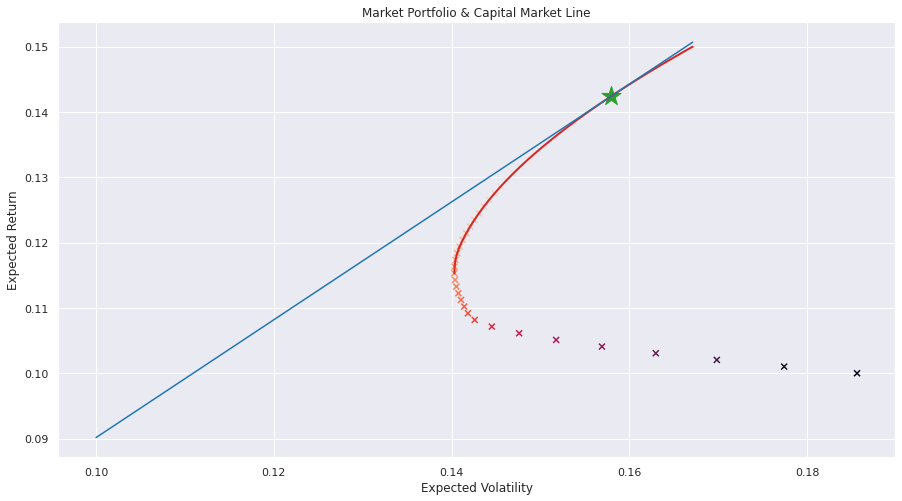

In [ ]:
# 자본시장선 데이터
x = np.linspace(0.1, evols[-1], 100)
y = (msr_ret / msr_vol) * x

# 효율적 경계선 및 자본시장선 시각화
plt.figure(figsize=(15, 8))

plt.scatter(tvols, trets, c=trets/tvols, marker='x')
plt.plot(evols, erets, 'tab:red', lw=2.0)

# 시장 포트폴리오
plt.scatter(msr_vol, msr_ret, marker='*', s=400, color='tab:green')

# 자본시장선
plt.plot(x, y, 'tab:blue')

plt.grid(True)

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.title('Market Portfolio & Capital Market Line')
